## CAEN Data Analysis Template ##

Importing our Packages

In [1]:
import csv
import numpy as np
import math
import scipy
import mplhep as hep
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import statistics

plt.style.use(hep.style.ROOT)

Step 1: Using Random Noise Samples to Calibrate our Data. This is our trigger data. 

In [8]:
#We Are using PTRIG data Here
with open('Run28_list.txt') as f:
    lines = f.read().split('\n')
tags = None
#Creating our array of channels
channels = []
#Our timestamp array
timeStamps = []
#Array mix to hold LG and HG data for each channel.
din = {}

for line in lines:
    #Skipping over text in the beginning of data file
    if line[:2]=="//" or len(line)==0:
        continue
    #First Line after Comments
    if tags is None:
        tags = line.split()
        tags = tags[-3:]
        continue;
    split = line.split()
    #Looping to the timestamp array
    if(len(split) == 6):
        timeStamps.append(float(split[0]))
    channel, LG, HG = split[-3:]
    #print(channel, LG, HG)
    #creating the array of LG and HG data for each channel.
    if channel not in channels:
        din[f"CH_{channel}_LG"] = []
        din[f"CH_{channel}_HG"] = []
        channels.append(channel)
    #print(channels)
    din[f"CH_{channel}_LG"].append(float(LG))
    din[f"CH_{channel}_HG"].append(float(HG))
#putting it all into a Data frame.
ptrigDF = pd.DataFrame(din)
print(f"Done! Total Events: {len(ptrigDF)}")

Done! Total Events: 60381


In [9]:
ptrigDF = pd.read_pickle(r'./PTRIG_LG50_HG50_4k_R28.pkl')

In [7]:
tot_channels = round(len(ptrigDF.columns)/2)
print(tot_channels)

40


Plotting and Fitting the Data for each channel.
From the Gaussian distribution we aim to get:
- The standard deviation, $\sigma$.
- The mean value, $\mu$

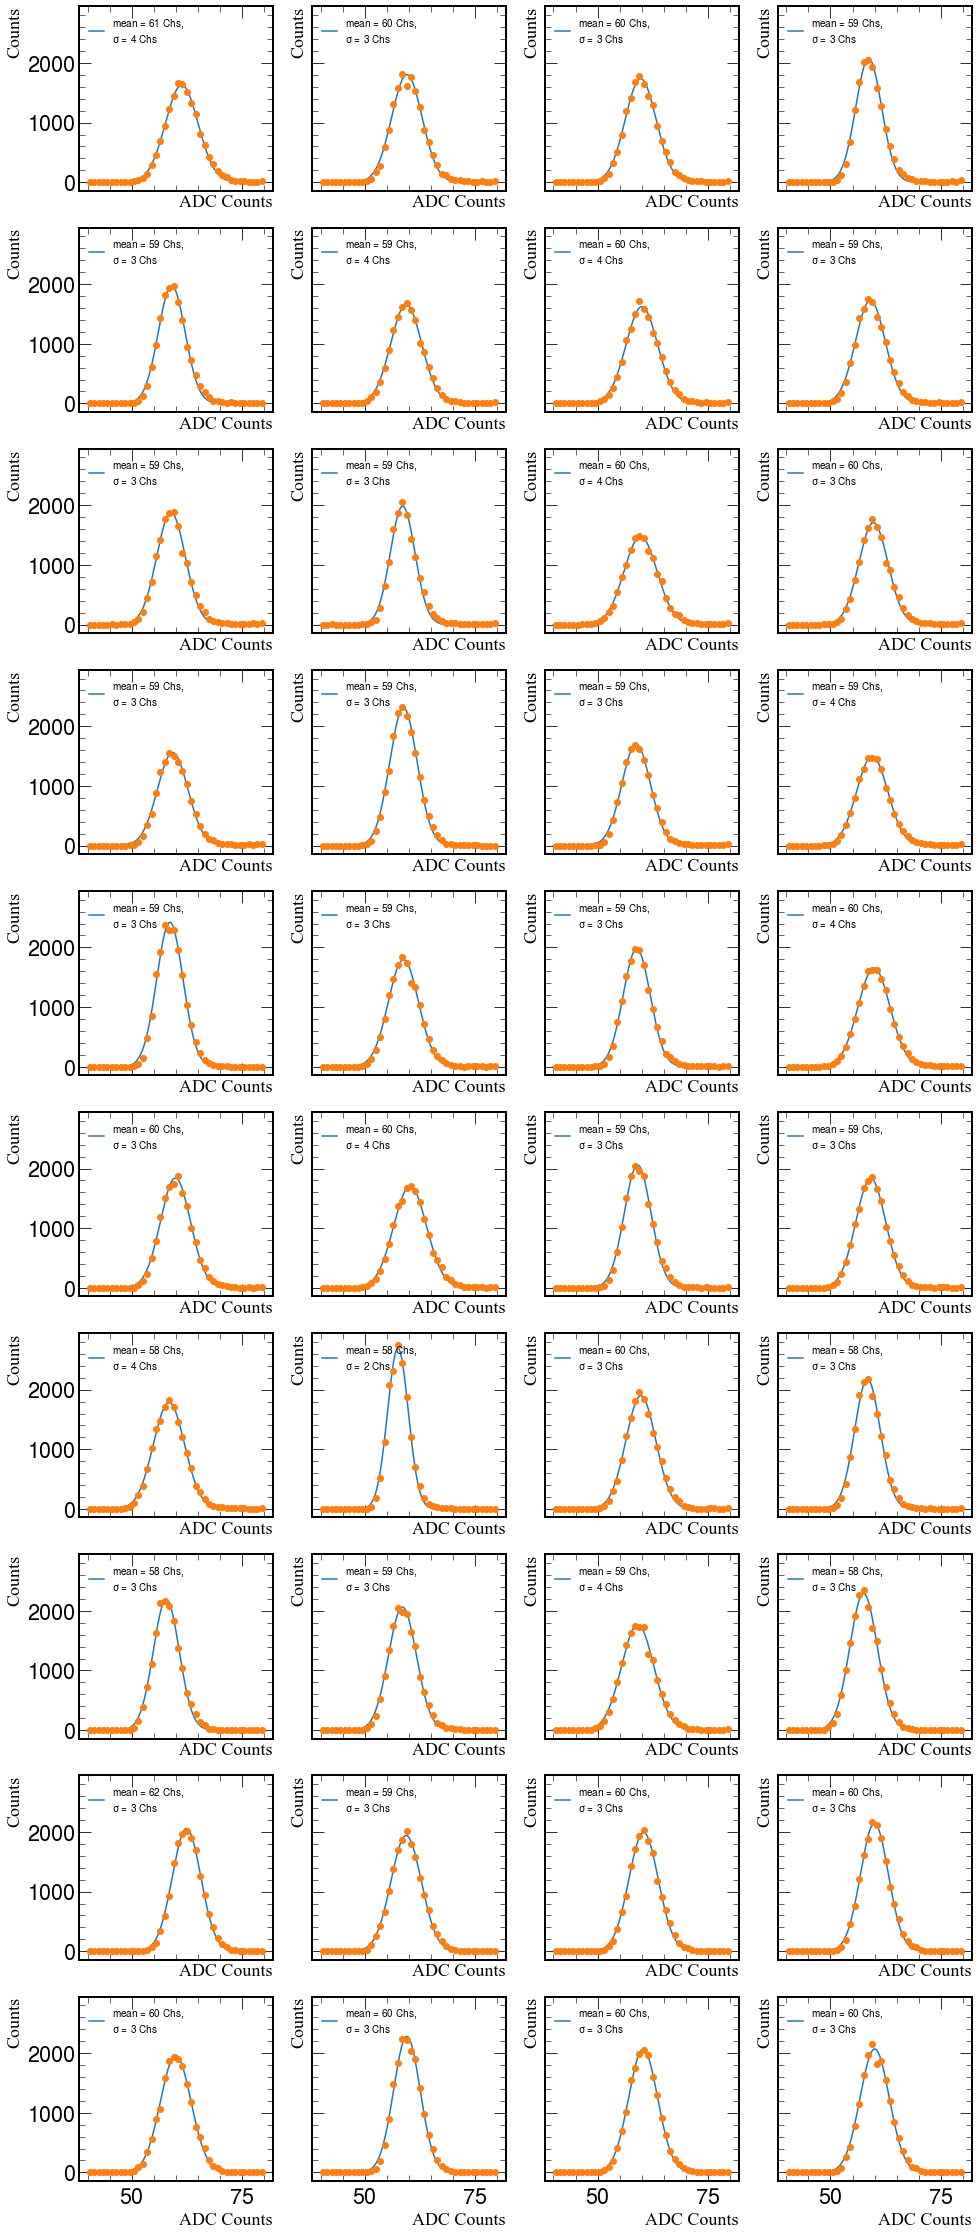

In [5]:
fig, axs = plt.subplots(10, 4, figsize=(16, 0.5*len(ptrigDF.columns)), sharey=True, sharex=True)
i = 0
pedMeans = []
pedStds = []

def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

for i in range(tot_channels):
    plt.sca(axs[i//4][i%4])

    hist, bin_edges = np.histogram(np.array(getattr(ptrigDF,"CH_{}_LG".format("{:02d}".format(i)))), range=(40,80), bins=40)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    #Getting our nice 
    p0 = [7000, 65, 10]
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist, p0=p0)
    x = np.linspace(40, 80, 500)
    hist_fit = gauss(x, *coeff)
    plt.plot(x, hist_fit, label='$mean$ = %2.0f Chs, \n$\sigma=$%2.0f Chs'%(coeff[1], abs(coeff[2])))
    plt.errorbar(bin_centers, y=hist, yerr=np.sqrt(hist), fmt='o')
    
    #Appending our standard deviation and pedistal mean. 
    pedMeans.append(coeff[1])
    pedStds.append(abs(coeff[2]))
    plt.legend(fontsize=10, loc="upper left")
    plt.xlabel("ADC Counts", fontname="Times New Roman", fontsize=18)
    plt.ylabel("Counts", fontname="Times New Roman", fontsize=18)

In [10]:
print(pedMeans)
print(pedStds)

[61.32580688564545, 59.56196979858667, 59.76804919321959, 58.66097445995093, 59.057443760815865, 59.41568044804967, 60.043292889826155, 59.04466868577354, 58.900895817381475, 58.61142997152673, 59.740261658694145, 59.732091185057904, 59.27928775974171, 58.791485001322, 58.746974389221094, 59.46705769958608, 58.63691005307876, 58.78139086949998, 58.8720605633587, 59.8694659245477, 59.8977898267057, 60.29955047709229, 59.08108550027246, 59.13188047452749, 58.43299936301312, 57.547711094624084, 59.8139774959031, 58.38428173308658, 57.82898413613177, 58.561910513449746, 59.09157020045538, 57.50752977239566, 62.42073876257855, 59.39831378371059, 60.42869437690079, 59.96622172346087, 59.970095711452444, 59.56678559895267, 60.32225432279755, 60.02339293206512]
[3.7025826928561836, 3.4437165103967406, 3.4965607361272584, 2.93048362487253, 3.0385867516210525, 3.5035749097808084, 3.5917642732910218, 3.3509341915566555, 3.2576099164078696, 2.795638616839301, 3.735040320711511, 3.293884326242203, 

<ErrorbarContainer object of 3 artists>

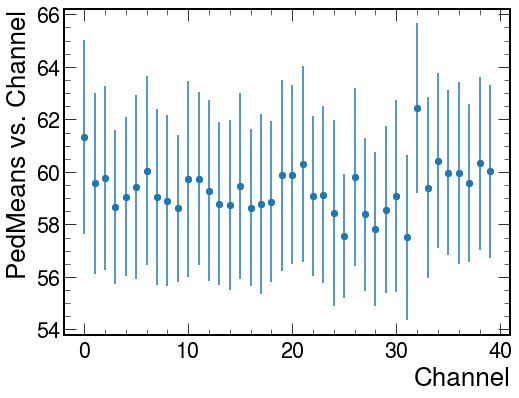

In [11]:
fid = plt.figure( figsize=(8,6))
plt.scatter(range(0,40), pedMeans)
plt.xlabel('Channel')
plt.ylabel("PedMeans vs. Channel")
plt.errorbar(range(0, 40), pedMeans, yerr=pedStds, fmt='o')

In [24]:
with open('Run1_list.txt') as f:
    lines = f.read().split('\n')
tag = None
chnls = []
timestamps = []
din = {}
for line in lines:
    if line[:2]=="//" or len(line)==0:
        continue
    #First Line after Comments
    if tag is None:
        tag = line.split()
        tag = tag[-3:]
        continue;
    split = line.split()
    #print(split)
    if(len(split) == 6):
        timestamps.append(float(split[0]))
    chnl, LG, HG = split[-3:]
    #print(chnl, LG, HG)
    if chnl not in chnls:
        din[f"Ch_{chnl}_LG"] = []
        din[f"Ch_{chnl}_HG"] = []
        chnls.append(chnl)
    #print(chnls)
    din[f"Ch_{chnl}_LG"].append(float(LG))
    din[f"Ch_{chnl}_HG"].append(float(HG))
    #print(chnl)

din[f"timestamps"] = []
din[f"timestamps"] = timestamps
cosmicDF = pd.DataFrame(din)
print(f"Done! Total Events: {len(cosmicDF)}")

cosmicDF.to_pickle("./COSMIC_LG50_HG50_4k_R1.pkl")  



Done! Total Events: 18114


In [15]:
cosmicDF = pd.read_pickle(r'./COSMIC_LG50_HG50_4k_R1.pkl')

FileNotFoundError: [Errno 2] No such file or directory: './COSMIC_LG50_HG50_4k_R1.pkl'

In [17]:
tot_chnls = round(len(cosmicDF.columns)/2)
print(tot_chnls)

40


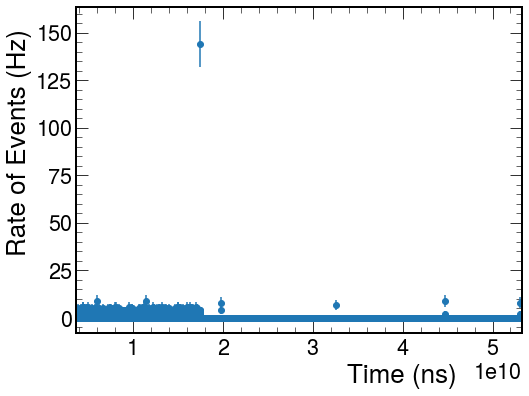

In [18]:
fig = plt.figure( figsize=(8,6))
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
minTime = np.min(getattr(cosmicDF, "timestamps"))
maxTime = np.max(getattr(cosmicDF, "timestamps"))
times = []
for evtn in range(len(cosmicDF)):
    times.append(getattr(cosmicDF, "timestamps")[evtn] - minTime)
    
hist, bin_edges = np.histogram(np.array(getattr(cosmicDF, "timestamps")), range=(minTime, maxTime), bins = round((maxTime - minTime) / 1e6))
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(bin_centers, y=hist, yerr=np.sqrt(hist), fmt='o')
plt.xlim([3.65e9, maxTime])
plt.xlabel("Time (ns)         ")
plt.ylabel("Rate of Events (Hz)   ")
#plt.ylim([0, 5])
plt.savefig('Rate_of_Events_per_Timestamp.png')

In [19]:
#timecut = cosmicDF["timestamps"]
cosmicDF = cosmicDF
#print(cosmicDF)

In [20]:
for i in range(tot_chnls):
    pureCosmic = np.array(getattr(cosmicDF,"Ch_{}_LG".format("{:02d}".format(i))))

    def Over_Pedestal(n):
        return n >= (pedMeans[i] + 3*pedStds[i])
    
    din[f"Cosmic_{i}_"] = list(filter(Over_Pedestal, pureCosmic))

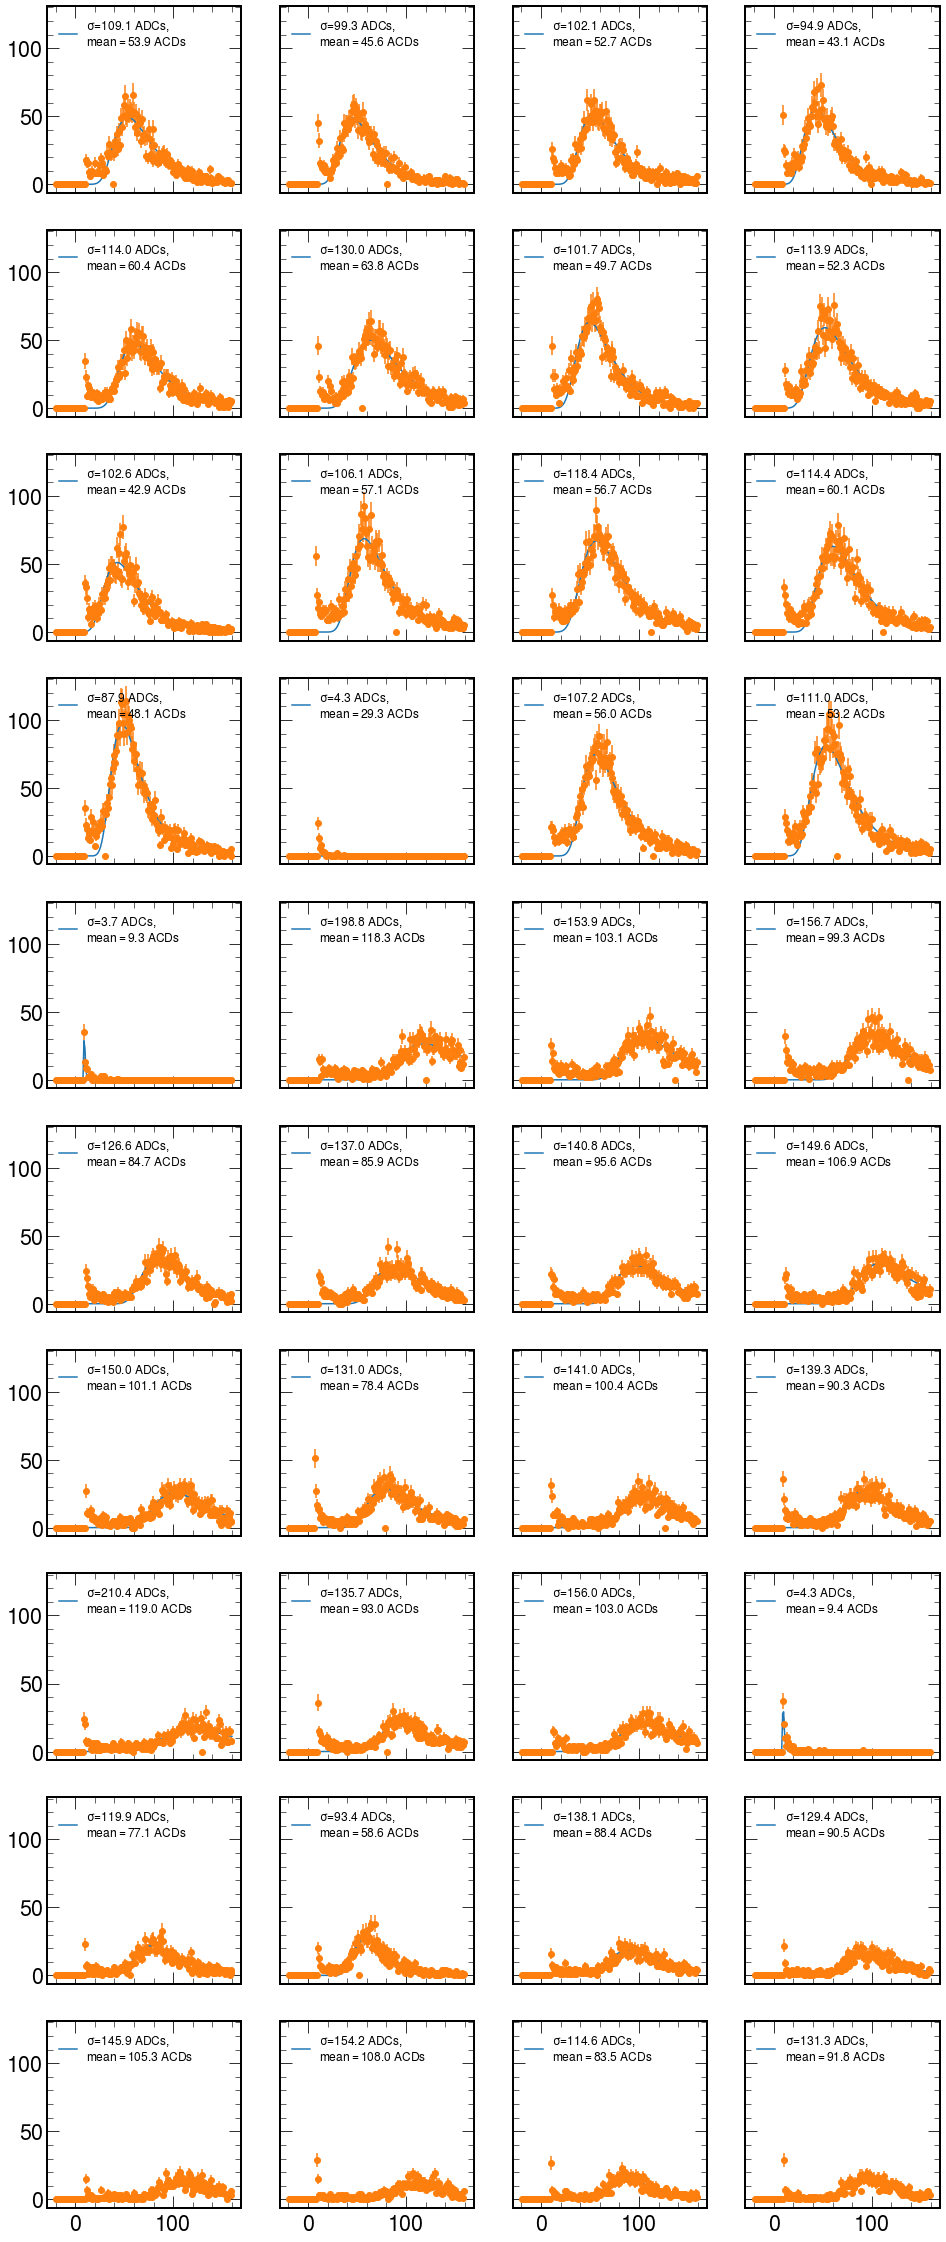

In [21]:
fig, axs = plt.subplots(10, 4, figsize=(16, 0.5*len(cosmicDF.columns)),  sharey=True, sharex=True)
min = -20
max = 160
MIPs = []

def landau(x, *p):
    A, sigma, c = p
    u = (x - c)*3.591/(sigma/2.355)
    Aprime = 1.648*A
    return Aprime*np.exp((-u)/2 - np.exp(-u)/2)

for i in range(tot_chnls):
    plt.sca(axs[i//4][i%4])
    
    subped = pedMeans[i]
    
    cosmic_data = np.array(din[f"Cosmic_{i}_"]) - pedMeans[i]
    hist, bin_edges = np.histogram(cosmic_data, range=(min,max), bins=181)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
    
    p0 = [np.max(hist), statistics.stdev(cosmic_data), statistics.mean(cosmic_data)]
    
    bounds = ([0.0, -np.inf, -np.inf], [np.inf, np.inf, np.inf])

    coeff, var_matrix = curve_fit(landau, bin_centers, hist, p0=p0, maxfev = 2000, bounds=bounds)
    
    x = np.linspace(min , max , 181)
    hist_fit = landau(x, *coeff)
    plt.plot(x, hist_fit, label='$\sigma$=%0.1f ADCs, \n$mean =$%0.1f ACDs'%(coeff[1], abs(coeff[2])), markersize=10)
    plt.errorbar(bin_centers, y=hist, yerr=np.sqrt(hist), fmt='o')
    plt.legend(fontsize=12, loc="upper left")
    MIPs.append(coeff[1])
    #plt.ylabel("Counts")
    #plt.yscale("log")
    #plt.scatter(x, hist)

[109.1033998343003, 99.3473236752529, 102.07604726432412, 94.93812023288733, 113.96196220330296, 130.02551822323218, 101.66201053505338, 113.92011760922965, 102.64279386710822, 106.14900250942722, 118.40731159831276, 114.41572202273645, 87.93566673136704, 4.304142083493494, 107.17365280566395, 111.04238848715032, 3.6870801469505627, 198.7538286736589, 153.91055865394515, 156.6627491115275, 126.61396337654462, 136.99593013500385, 140.77994442516388, 149.6400393221439, 149.9831554034296, 131.0011195003082, 140.97478674036262, 139.31318097181793, 210.3824208584243, 135.69360204076276, 156.04154569058227, 4.303209122808489, 119.92798268269564, 93.35236114517666, 138.08627453587056, 129.36183143902463, 145.89044583477823, 154.17721942395255, 114.63218271500732, 131.26492987546015]


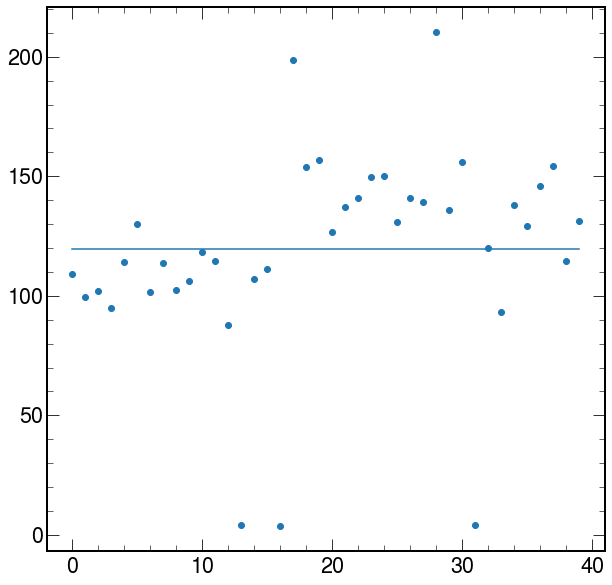

In [22]:
mean_array = []
length = len(MIPs)

for i in range(length):
    mean_array.append(statistics.mean(MIPs))
    
plt.scatter(range(length), MIPs)
plt.plot(range(length), mean_array)
print(MIPs)